In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-data/internet_data.csv
/kaggle/input/telecom-churn-data/customer_data.csv
/kaggle/input/telecom-churn-data/Telecom Churn Data Dictionary.csv
/kaggle/input/telecom-churn-data/churn_data.csv


In [75]:
churn_data = pd.read_csv('/kaggle/input/telecom-churn-data/churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
customer_data = pd.read_csv('/kaggle/input/telecom-churn-data/customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [77]:
internet_data = pd.read_csv('/kaggle/input/telecom-churn-data/internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [78]:
#merging on customer ID
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')
telecom = pd.merge(df_1,internet_data, how = 'inner', on='customerID')

In [79]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [80]:
telecom.shape

(7043, 21)

**Exploratory Data Analysis**

In [81]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [82]:
telecom.describe() # we have 3 cols of numeric data type 

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [83]:
telecom.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [84]:
telecom.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [85]:
telecom.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [86]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [87]:
telecom['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [88]:
telecom['OnlineSecurity'].unique() # we have yes, no and No internet service in this 
#if it had only yes/no then we can convert to 0/1

array(['No', 'Yes', 'No internet service'], dtype=object)

In [89]:
telecom.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [90]:
#converting object to float type
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [91]:
categ = telecom.select_dtypes(include=object).columns
categ

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'gender', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [92]:
for i in categ:
    print(telecom[i].value_counts())
    print('\n')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


No     5174
Yes    1869
Name: Churn, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No        

In [93]:
#converting yes or no to 0/1
cols = ['PhoneService','PaperlessBilling','Partner','Dependents','Churn']
for i in cols:
    telecom[i]=telecom[i].apply(lambda x: 1 if x=='Yes' else 0)
    
    

In [94]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [95]:
#For categorical cols with multiple levels we get dummy var or one hot encoding 
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [96]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [97]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'],prefix = 'MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [98]:
# Multiple lines yes and no are added
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,1,0,0,0,1,1,0,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,0,0,1,1,0,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,0,1,0,0,1,0,1,0


In [99]:
# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


In [100]:
# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


In [101]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [102]:
# now we drop the repeated variables
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [103]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [105]:
telecom.shape

(7043, 32)

**Now we have all numeric columns**

In [107]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [114]:
#dropping the null val of total charges
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [116]:
telecom['TotalCharges'].isnull().sum()

0

**EDA is done 
Now we test-train split the data**

In [117]:
#importing
from sklearn.model_selection import train_test_split

In [125]:
# x var
X = telecom.drop(['customerID','Churn'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [126]:
#y has target var
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [127]:
#Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7 ,test_size = 0.3, random_state= 1)

In [128]:
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
1584,65,0,1,53.50,3517.90,1,0,0,0,1,...,0,1,0,1,1,0,0,1,0,1
1043,32,1,1,69.75,2347.90,0,1,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1077,41,1,1,114.50,4527.45,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2478,4,1,0,44.55,220.75,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
6908,9,1,0,55.35,449.75,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,19,1,1,65.35,1231.85,0,0,0,1,0,...,0,1,1,0,0,1,1,0,0,1
5200,70,1,1,106.50,7397.00,0,1,1,1,0,...,0,1,0,1,1,0,0,1,0,1
3987,11,1,1,76.50,837.95,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
235,2,1,1,54.40,114.10,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


**Next we do Feature Scaling**

In [131]:
from sklearn.preprocessing import StandardScaler
#minmax scaler gives 0 to 1 range only if col has +ve values if -ve it gives -1 to +1

In [132]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
1584,1.330585,0,1,-0.383857,0.534804,1,0,0,0,1,...,0,1,0,1,1,0,0,1,0,1
1043,-0.013956,1,1,0.155250,0.022199,0,1,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1077,0.352737,1,1,1.639866,0.977112,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2478,-1.154780,1,0,-0.680780,-0.909757,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
6908,-0.951061,1,0,-0.322482,-0.809427,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0


<AxesSubplot:>

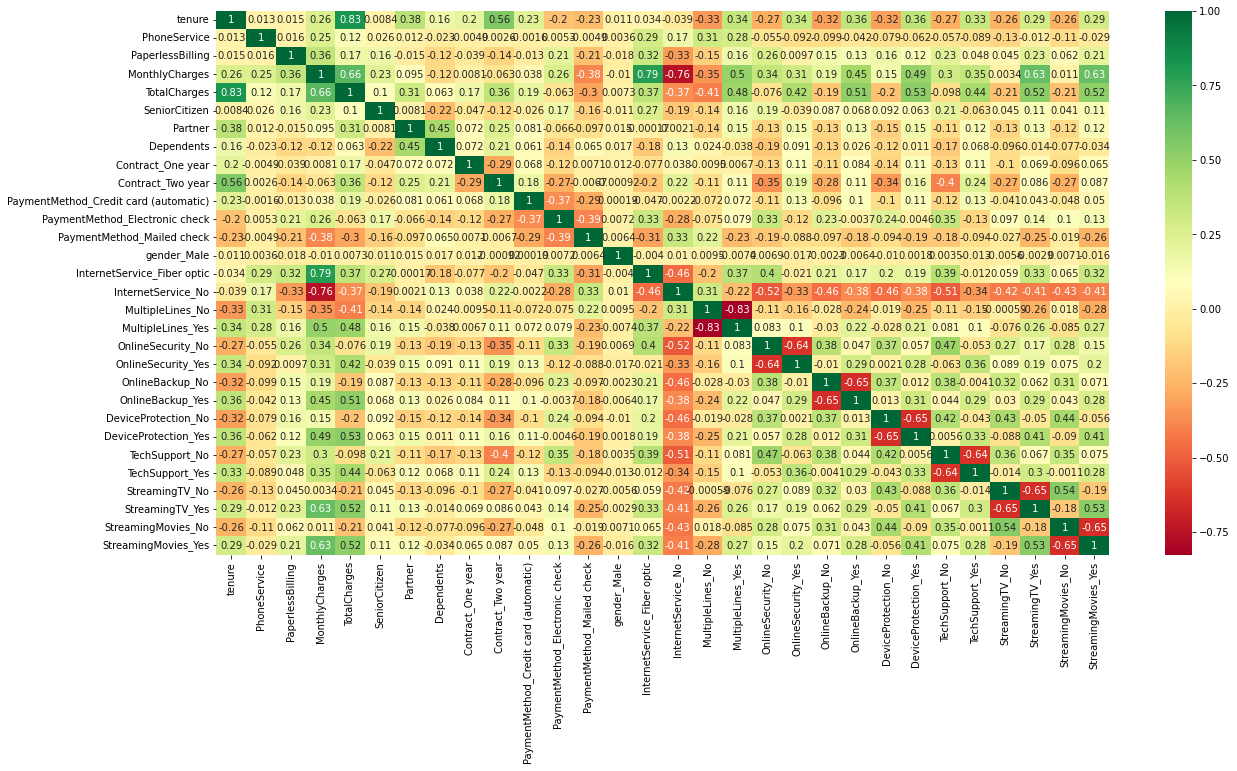

In [139]:
#chceking for co relations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),cmap='RdYlGn', annot=True)

In [140]:
#dropping the negatively corelated dummy variables
X_train = X_train.drop(['InternetService_No','MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                        'TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_test = X_test.drop(['InternetService_No','MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                        'TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [142]:
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
1584,1.330585,0,1,-0.383857,0.534804,1,0,0,0,1,...,0,0,0,0,0,1,1,0,1,1
1043,-0.013956,1,1,0.155250,0.022199,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
1077,0.352737,1,1,1.639866,0.977112,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2478,-1.154780,1,0,-0.680780,-0.909757,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6908,-0.951061,1,0,-0.322482,-0.809427,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,-0.543624,1,1,0.009276,-0.466770,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
5200,1.534304,1,1,1.374460,2.234331,0,1,1,1,0,...,0,0,1,1,0,1,1,0,1,1
3987,-0.869574,1,1,0.379186,-0.639347,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
235,-1.236267,1,1,-0.353999,-0.956483,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0


<AxesSubplot:>

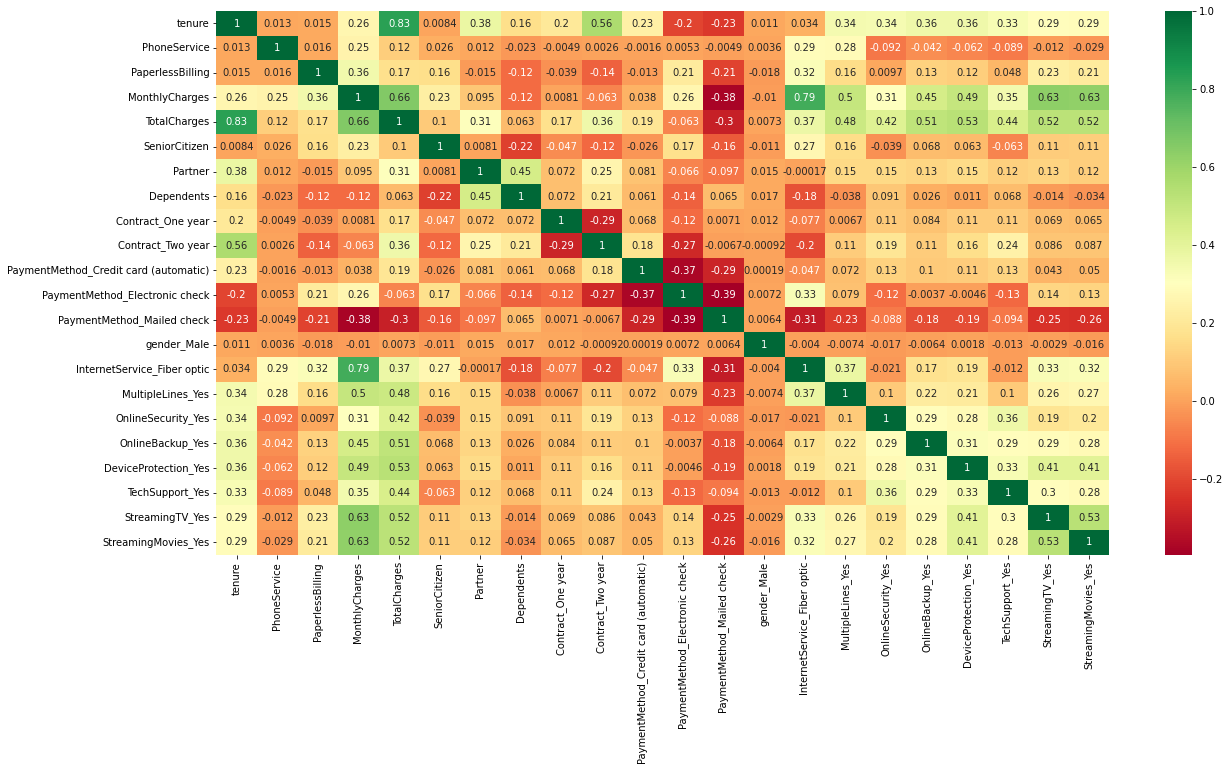

In [141]:
#chceking for co relations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),cmap='RdYlGn', annot=True)

**Model Building**

In [143]:
#importing
import statsmodels.api as sm


In [147]:
X_train1 = sm.add_constant(X_train)
model = sm.GLM(y_train,X_train1,family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.3
Date:                Sat, 15 Oct 2022   Deviance:                       4080.7
Time:                        08:08:05   Pearson chi2:                 5.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2821
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0095      0.346      0.027      0.978      -0.669       0.688
tenure                                   -1.5702      0.185     -8.500      0.000      -1.932      -1.208
PhoneService                             -1.2534      0.174     -7.203      0.000      -1.594      -0.912
PaperlessBilling                          0.2751      0.089      3.109      0.002       0.102       0.449
MonthlyCharges                            0.7785      0.195      3.990      0.000       0.396       1.161
TotalCharges                              0.8049      0.193      4.161      0.000       0.426       1.184
SeniorCitizen                             0.2144      0.100      2.143      0.032       0.018       0.410
Partner                                  -0.0255      0.092     -0.276      0.783      -0.206       0.156
Dependents                               -0.0526      0.107     -0.492      0.623      -0.262       0.157
Contract_One year                        -0.7172      0.128     -5.610      0.000      -0.968      -0.467
Contract_Two year                        -1.5698      0.215     -7.304      0.000      -1.991      -1.149
PaymentMethod_Credit card (automatic)    -0.0028      0.136     -0.020      0.984      -0.269       0.264
PaymentMethod_Electronic check            0.2917      0.114      2.568      0.010       0.069       0.514
PaymentMethod_Mailed check               -0.1711      0.138     -1.243      0.214      -0.441       0.099
gender_Male                               0.0224      0.077      0.289      0.772      -0.129       0.174
InternetService_Fiber optic               0.0524      0.226      0.232      0.817      -0.390       0.495
MultipleLines_Yes                         0.2327      0.103      2.265      0.024       0.031       0.434
OnlineSecurity_Yes                       -0.4987      0.112     -4.468      0.000      -0.717      -0.280
OnlineBackup_Yes                         -0.3058      0.101     -3.022      0.003      -0.504      -0.107
DeviceProtection_Yes                     -0.2242      0.103     -2.177      0.030      -0.426      -0.022
TechSupport_Yes                          -0.4626      0.112     -4.115      0.000      -0.683      -0.242
StreamingTV_Yes                          -0.0077      0.120     -0.064      0.949      -0.244       0.228
StreamingMovies_Yes                       0.0231      0.120      0.193      0.847      -0.212       0.258
=========================================================================================================
"""

Higher p value means the var is less significant

**Now we select the features using RFE**

In [149]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [151]:
rfe = RFE(logReg, step=1, verbose=1)
rfe.fit(X_train, y_train)

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.


RFE(estimator=LogisticRegression(), verbose=1)

In [153]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True, False, False])

In [156]:
#cols after RFE
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes'],
      dtype='object')

In [157]:
col1 = X_train.columns[~rfe.support_]
col1

Index(['SeniorCitizen', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'MultipleLines_Yes',
       'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [160]:
# add new constant and use the cols got after rfe
X_train_sm = sm.add_constant(X_train[col])
model2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.9
Date:                Sat, 15 Oct 2022   Deviance:                       4101.8
Time:                        08:21:46   Pearson chi2:                 5.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2790
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0162      0.177      0.092      0.927      -0.330       0.363
tenure                            -1.5094      0.179     -8.431      0.000      -1.860      -1.159
PhoneService                      -1.1938      0.151     -7.886      0.000      -1.491      -0.897
PaperlessBilling                   0.3000      0.088      3.409      0.001       0.127       0.472
MonthlyCharges                     0.8608      0.075     11.530      0.000       0.714       1.007
TotalCharges                       0.7862      0.187      4.212      0.000       0.420       1.152
Contract_One year                 -0.7939      0.125     -6.354      0.000      -1.039      -0.549
Contract_Two year                 -1.6669      0.212     -7.847      0.000      -2.083      -1.251
PaymentMethod_Electronic check     0.3682      0.082      4.473      0.000       0.207       0.530
OnlineSecurity_Yes                -0.5327      0.100     -5.344      0.000      -0.728      -0.337
OnlineBackup_Yes                  -0.3223      0.092     -3.492      0.000      -0.503      -0.141
TechSupport_Yes                   -0.5336      0.100     -5.314      0.000      -0.730      -0.337
==================================================================================================
"""

In [161]:
#getting the predicted values
y_train_pred = result2.predict(X_train_sm)
y_train_pred

1584    0.026823
1043    0.330602
1077    0.350043
2478    0.323908
6908    0.428533
          ...   
907     0.112455
5200    0.268612
3987    0.651776
235     0.403563
5165    0.686018
Length: 4922, dtype: float64

In [162]:
#Creating the dataframe with actual churn flag and predict the prob
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn_prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final

,Churn,Churn_prob,CustID
1584,0,0.026823,1584
1043,1,0.330602,1043
1077,1,0.350043,1077
2478,0,0.323908,2478
6908,1,0.428533,6908
...,...,...,...
907,0,0.112455,907
5200,0,0.268612,5200
3987,1,0.651776,3987
235,1,0.403563,235


Creating a new col with prob = 1 if it is >0.5

In [163]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.apply(lambda x: 1 if x> 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Predicted
1584,0,0.026823,1584,0
1043,1,0.330602,1043,0
1077,1,0.350043,1077,0
2478,0,0.323908,2478,0
6908,1,0.428533,6908,0


Next we do some evaluation

In [170]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [169]:
confusion = confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['Predicted'])
confusion

array([[3222,  386],
       [ 587,  727]])

In [ ]:
# Predicted     not_churn    churn              0     1
# Actual
# not_churn        3222      386            0   TN    FP
# churn            587       727            1   FN    TP

In [171]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.8023161316537992


In [ ]:
# 1.What we did so far -  RFE - removed some features - used sm.GLM() to make logistic regression model,
#  we saw all p-values are less and features are significant - we proceed with these features - now, we get the predicted y_TRAIN_pred (TRAIN DATA) values
# 2. We make a new dataframe, add Actual Churn v/s Predicted Prob.
# 3. We make new column Pred.Churn
# 4. Now we got our matrix, we import sklearn.metrics import confusion_matrix
# 5. We find the confusion = confusion_matrix(y_true,y_pred)
# 6. We got the accuracy for our TRAINING DATA


# Now, what we need to do further
# 1. So after we get our accuracy (with significant features using RFE) for TRAINING DATA, we will check multicollinearity using Manual Feature Elimination (VIFs).
# 2. from statsmodels.stats.outliers_influence import variance_inflation_factor
# 3. So we get VIFs for each feature and check if VIF(i)>5. Drop 1 by 1 until we get all features VIF less than 5. (This involves lot of model iterations)
# 4. We got all features less than 5 VIF and significant features.
# NOTE: WE GOT THE FINAL PROBABILITIES, WE ONLY NOW, NEED TO FIND THE OPTIMAL THRESHOLD SO THAT WE CAN GET OUR PREDICTED TRAINING DATA OUTPUT.

# 5. Now we get confusion matrix, and we get TP, TN, FP, FN and calculate all metrics.
# 6. Plot the ROC curve
# 7. Find the optimal ROC threshold by:
        # A. Calculating predicted value for diff. cut offs
        # B. Calculating accuracy, sensitivity, specificity for each cut off
        # C. Find the optimal threshold among all the cut offs. There should be trade-off between all the 3.
# 8. Now we use the optimal threshold for finding the final_predicted for TRAINING DATA.
# 9. Check the accuracy, confusion matrix, all other metrics
# 10. Now, we check for Precision-Recall trade-off.
# 11. from sklearn.metrics import precision_score, recall_score
# 12. from sklearn.metrics import precision_recall_curve
# 13. We took the optimal threshold using precision-recall trade-off for THIS PARTICULAR CASE STUDY.
# 14. Finally, we are ready with our trained Logistic Regression Model.


# NOW, WE WILL USE THE TRAINED MODEL ON TEST DATA
# 1. We first scale our test data.
# 2. Make predictions using the latest model (optimal model)
# 3. Make a new dataframe with actual Churn v/s PREDICTED TEST DATA CHURN USING OPTIMAL CUTOFF/THRESHOLD.
# 4. Now we make the final confusion matrix and calculate our FINAL TEST DATA PREDICTIONS AND EVALUATIONS.
# THE END!!
# CONGRATULATIONS!!